<a href="https://colab.research.google.com/github/devtico/geochemistry-insights/blob/master/Solo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>SOLO</h1>

#Importações, troca de diretório e carregamento de banco

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/prosp_geoq

/content/gdrive/My Drive/prosp_geoq


In [ ]:
import perso
import pandas as pd
import matplotlib.pyplot as plt
import stat
import numpy as np
import altair as alt
!pip install geostatspy
import geostatspy.GSLIB as GSLIB
import geostatspy.geostats as geostats
!pip install pyproj
import pyproj
import scipy
from sklearn.preprocessing import scale
!pip install plotly==4.3.0
import plotly.express as px

In [ ]:
solo = pd.read_excel('Lavras do Sul.xlsx', sheet_name=3)

Ajusta display de linhas

In [ ]:
pd.options.display.max_rows =1000

#Análise exploratória

Visualização preliminar

In [ ]:
solo.head()

,OBJECTID,id_amostra,amostra,numero_campo,base_cartografica,id_classe_amostra,classe_amostra,tipo_amostra,material_coletado,fonte_amostra,tipo_vegetacao,tipo_solo,pluviosidade,horizonte_solo,metodo,abertura,unidade,precisao,consistencia,data,ag,al,bi,b,ca,cd,ce,co,cr,cs,fe,ga,ge,hf,hg,indio,la,mg,mn,mo,nb,ni,pb,sc,sr,ta,th,ti,y,zn,arsenio,au,ba,be,cu,sn,w,li,v,u,DATUM,POINT_X,POINT_Y
0,81575,256109,JAD178,RH0061,SH-22-Y-A-IV-3,7,Solo,Canal,Solo,Poço,Terras cultivadas,Jovem,Chuvas esparsas,A,Espectroscopia de absorção atômica,HNO3 a quente,ppm,0,NaN,NaN,Interferência,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"15,00",NaN,NaN,NaN,NaN,NaN,NaN,"35,00",NaN,NaN,NaN,NaN,"35,00",NaN,NaN,NaN,NaN,NaN,SIRGAS 2000,-53.919167,-30.879444
1,81576,256109,JAD178,RH0061,SH-22-Y-A-IV-3,7,Solo,Canal,Solo,Poço,Terras cultivadas,Jovem,Chuvas esparsas,A,Espectrometria ótica de emissão,Semiquantitativa,ppm,0,NaN,NaN,Não detectado,NaN,"<10,00","20,00",NaN,Não detectado,NaN,"30,00","300,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"50,00",NaN,"1500,00",Não detectado,"10,00","50,00","20,00","15,00","100,00",NaN,NaN,NaN,"20,00",Não detectado,Não detectado,Não detectado,"500,00","1,00","100,00",Não detectado,Não detectado,NaN,"100,00",NaN,SIRGAS 2000,-53.919167,-30.879444
2,81577,256109,JAD178,RH0061,SH-22-Y-A-IV-3,7,Solo,Canal,Solo,Poço,Terras cultivadas,Jovem,Chuvas esparsas,A,Espectrometria ótica de emissão,Semiquantitativa,%,0,NaN,NaN,NaN,NaN,NaN,NaN,"0,30",NaN,NaN,NaN,NaN,NaN,"3,00",NaN,NaN,NaN,NaN,NaN,NaN,"0,50",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,50",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SIRGAS 2000,-53.919167,-30.879444
3,81578,252065,JAD196,RH0079,SH-22-Y-A-IV-3,7,Solo,Canal,Solo,Poço,Terras cultivadas,Não especificado,Chuvas esparsas,C,Espectroscopia de absorção atômica,HNO3 a quente,ppm,0,NaN,NaN,Interferência,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"20,00",NaN,NaN,NaN,NaN,NaN,NaN,"50,00",NaN,NaN,NaN,NaN,"50,00",NaN,NaN,NaN,NaN,NaN,SIRGAS 2000,-53.919167,-30.881111
4,81579,252065,JAD196,RH0079,SH-22-Y-A-IV-3,7,Solo,Canal,Solo,Poço,Terras cultivadas,Não especificado,Chuvas esparsas,C,Espectrometria ótica de emissão,Semiquantitativa,ppm,0,NaN,NaN,Não detectado,NaN,Não detectado,"20,00",NaN,Não detectado,NaN,"30,00","200,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"20,00",NaN,"500,00",Não detectado,"10,00","100,00","10,00","30,00","100,00",NaN,NaN,NaN,"20,00",Não detectado,Não detectado,Não detectado,"300,00","1,00","70,00",Não detectado,Não detectado,NaN,"200,00",NaN,SIRGAS 2000,-53.919167,-30.881111


Verifica tipos de dados

In [ ]:
solo.dtypes

OBJECTID               int64
id_amostra             int64
amostra               object
numero_campo          object
base_cartografica     object
id_classe_amostra      int64
classe_amostra        object
tipo_amostra          object
material_coletado     object
fonte_amostra         object
tipo_vegetacao        object
tipo_solo             object
pluviosidade          object
horizonte_solo        object
metodo                object
abertura              object
unidade               object
precisao               int64
consistencia         float64
data                 float64
ag                    object
al                    object
bi                    object
b                     object
ca                    object
cd                    object
ce                    object
co                    object
cr                    object
cs                    object
fe                    object
ga                    object
ge                    object
hf                    object
hg            

Remove caracteres especiais

In [ ]:
solo = solo.replace(['Não detectado', np.nan])
solo = solo.replace(',', '.', regex=True)
solo = solo.replace('<', '', regex=True)
solo = solo.replace('>', '', regex=True)
solo = solo.replace(['Interferência', np.nan])

Pegando somente colunas necessárias

In [ ]:
l = solo.columns.to_list()
print(l)

['OBJECTID', 'id_amostra', 'amostra', 'numero_campo', 'base_cartografica', 'id_classe_amostra', 'classe_amostra', 'tipo_amostra', 'material_coletado', 'fonte_amostra', 'tipo_vegetacao', 'tipo_solo', 'pluviosidade', 'horizonte_solo', 'metodo', 'abertura', 'unidade', 'precisao', 'consistencia', 'data', 'ag', 'al', 'bi', 'b', 'ca', 'cd', 'ce', 'co', 'cr', 'cs', 'fe', 'ga', 'ge', 'hf', 'hg', 'indio', 'la', 'mg', 'mn', 'mo', 'nb', 'ni', 'pb', 'sc', 'sr', 'ta', 'th', 'ti', 'y', 'zn', 'arsenio', 'au', 'ba', 'be', 'cu', 'sn', 'w', 'li', 'v', 'u', 'DATUM', 'POINT_X', 'POINT_Y']


In [ ]:
col_uteis = ['OBJECTID', 'POINT_X', 'POINT_Y','ag', 'al', 'bi', 'b', 'ca', 'cd', 'ce', 'co', 'cr', 'cs', 'fe', 'ga', 'ge', 'hf', 'hg', 'indio', 'la', 'mg', 'mn', 'mo', 'nb', 'ni', 'pb', 'sc', 'sr', 'ta', 'th', 'ti', 'y', 'zn', 'arsenio', 'au', 'ba', 'be', 'cu', 'sn', 'w', 'li', 'v', 'u']

In [ ]:
variaveis = col_uteis[3:]

In [ ]:
bd = solo[col_uteis]

Converte tipos de dados

In [ ]:
bd.replace('Interferência', np.nan, inplace=True)

In [ ]:
bd[variaveis] = bd[variaveis].astype(float) 

Verifica todas as unidades de medidas presentes no banco

In [ ]:
perso.montSet(solo['unidade'])

{'%', 'ppb', 'ppm'}

Verifica se todas as variaveis possuem mais de uma unidade de medida

In [ ]:
var = []
unil = []
for v in col_uteis[3:]:
  fati = solo.loc[:, ['unidade', v]]
  uni = perso.montSet(solo.unidade)
  var.append(v)
  unil.append(uni)
dfuni = pd.DataFrame(var)
dfuni['uni'] = unil
dfuni

,0,uni
0,ag,"{ppm, ppb, %}"
1,al,"{ppm, ppb, %}"
2,bi,"{ppm, ppb, %}"
3,b,"{ppm, ppb, %}"
4,ca,"{ppm, ppb, %}"
5,cd,"{ppm, ppb, %}"
6,ce,"{ppm, ppb, %}"
7,co,"{ppm, ppb, %}"
8,cr,"{ppm, ppb, %}"
9,cs,"{ppm, ppb, %}"


*Todas as variáveis possuem 3 unidades de medidas diferentes*

Obtendo nova escala:

In [ ]:
bd[variaveis] = scale(bd[variaveis])

Converte coordenadas

In [ ]:
source = pyproj.Proj(proj='latlong', datum='WGS84')
target = pyproj.Proj(proj='utm', zone=22, datum='WGS84')
point_x = bd.POINT_X.to_list()
point_y = bd.POINT_Y.to_list()
x, y = pyproj.transform(source, target, point_x, point_y)
bd['POINT_X'] = x
bd['POINT_Y'] = y 

#Univariada

Sumário estatístico

In [ ]:
suma = perso.sumaEst(bd)

In [ ]:
suma

,OBJECTID,POINT_X,POINT_Y,ag,al,bi,b,ca,cd,ce,co,cr,cs,fe,ga,ge,hf,hg,indio,la,mg,mn,mo,nb,ni,pb,sc,sr,ta,th,ti,y,zn,arsenio,au,ba,be,cu,sn,w,li,v,u
contagem,328.000,328.000,328.000,218.000,219.000,327.000,327.000,326.000,220.000,220.000,327.000,327.000,220.000,326.000,220.000,220.000,220.000,218.000,218.000,327.000,326.000,327.000,220.000,327.000,327.000,328.000,327.000,327.000,220.000,220.000,326.000,327.000,328.000,220.000,218.000,327.000,327.000,328.000,220.000,217.000,220.000,327.000,220.000
média,402198.454,219658.580,-3419178.853,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000
variância,82062891091.148,23779619.067,51744649.814,1.005,1.005,1.003,1.003,1.003,1.005,1.005,1.003,1.003,1.005,1.003,1.005,0.000,1.005,1.005,1.005,1.003,1.003,1.003,1.005,1.003,1.003,1.003,1.003,1.003,0.000,1.005,1.003,1.003,1.003,1.005,1.005,1.003,1.003,1.003,1.005,1.005,1.005,1.003,1.005
desvio padrão,286466.213,4876.435,7193.375,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,0.000,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,0.000,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002
coeficiente de variação,0.712,0.022,-0.002,511191841730647.938,5244285725797890.000,-3271270431581679.000,-4712249379678576.000,-36760761803394824.000,-2709553679726015.500,-1118301152724764.625,18670051339739200.000,-24582234263989916.000,1850981218303051.750,-9456144515342736.000,11064639817488410.000,nan,-8560788134651616.000,-2902785531951324.500,-762825035140698.000,-35117477519985572.000,10140899807833060.000,-9965770647563486.000,3352072316015483.500,2341165167999047.000,-35974001361936460.000,14934386267662768.000,11991333787312170.000,10630155357401088.000,nan,-1550431574737838.750,5141365287188081.000,-18909410972299972.000,-184929704955042368.000,141864489088512528.000,-41324694817070808.000,-15859505976767678.000,-3367429351231499.000,-36877900267568416.000,-9930514236195884.000,651723707039187.000,7580545218470111.000,5608114280758164.000,-3493584603762840.500
mínimo,81575.000,216150.697,-3425572.714,-1.184,-2.343,-0.345,-1.087,-0.770,-1.083,-1.357,-1.234,-0.962,-1.259,-1.401,-3.747,0.000,-1.639,-0.981,-1.235,-0.785,-1.032,-1.589,-0.934,-2.871,-0.519,-0.176,-1.633,-1.301,0.000,-0.653,-1.312,-1.358,-0.586,-1.334,-0.691,-1.030,-0.801,-0.450,-0.709,-0.578,-2.872,-1.736,-1.251
q1,88062.500,216172.267,-3421805.275,-1.180,-0.331,-0.098,-0.444,-0.543,-0.803,-1.071,-0.710,-0.863,-0.463,-0.898,0.015,0.000,-0.293,-0.975,-1.235,-0.767,-0.914,-0.731,-0.891,0.132,-0.483,-0.176,-0.440,-0.574,0.000,-0.351,-0.790,-0.740,-0.464,-1.279,-0.688,-0.609,-0.271,-0.337,-0.365,-0.549,0.003,-0.735,-0.341
q2,407938.500,218243.226,-3420107.999,0.859,-0.331,-0.098,-0.444,-0.348,0.483,0.657,-0.317,-0.466,-0.463,-0.272,0.015,0.000,-0.158,0.542,0.849,-0.407,-0.531,-0.353,0.193,0.132,-0.411,-0.144,0.188,-0.574,0.000,-0.351,-0.265,0.032,-0.341,0.814,0.051,-0.398,-0.271,-0.237,-0.064,-0.549,0.154,-0.294,0.228
q3,636389.500,220913.721,-3419953.970,0.859,-0.331,-0.098,0.270,0.003,0.483,0.657,0.666,1.515,0.064,0.353,0.552,0.000,-0.158,0.542,0.849,0.314,0.941,0.276,0.193,0.132,-0.159,-0.111,0.188,0.980,0.000,-0.351,0.435,0.032,-0.130,0.814,0.051,0.061,-0.271,-0.003,-0.064,-0.549,0.154,0.442,0.228
máximo,891887.000,240574.238,-3378114.335,0.942,1.682,6.688,5.985,4.686,6.352,3.979,2.630,1.515,1.940,2.854,1.089,0.000,4.017,5.411,1.266,3.918,1.824,4.680,3.505,3.142,3.090,9.334,2.699,6.418,0.000,3.732,2.186,3.889,7.288,0.814,5.696,5.079,5.819,9.359,6.988,1.804,1.953,2.649,6.031


Histogramas

In [ ]:
sc = bd.loc[:,'ag':]

In [ ]:
sc = sc.melt(var_name="variable", value_name="value")

In [ ]:
#px.histogram(sc, x = 'value', y = 'variable', nbins=20, facet_col='variable') #não funciona

#Bivariada

In [ ]:
oposto = variaveis[:]

In [ ]:
oposto.reverse()

In [ ]:
sc2 = bd[variaveis]

Scatter plots

In [ ]:

source = sc2

alt.Chart(source).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Origin:N'
).properties(
    width=150,
    height=150
).repeat(
    row=variaveis,
    column=oposto
)

alt.RepeatChart(...)

Matriz de correlação

In [ ]:
cor = sc2.corr()
cor

,ag,al,bi,b,ca,cd,ce,co,cr,cs,fe,ga,ge,hf,hg,indio,la,mg,mn,mo,nb,ni,pb,sc,sr,ta,th,ti,y,zn,arsenio,au,ba,be,cu,sn,w,li,v,u
ag,1.000,-0.385,0.116,0.229,-0.005,0.582,0.752,0.113,0.100,-0.535,0.053,0.001,nan,-0.208,0.788,0.995,-0.396,-0.108,0.171,0.213,0.203,0.110,-0.071,0.118,0.309,nan,-0.384,0.170,0.065,-0.055,0.886,0.227,-0.027,-0.229,-0.023,0.146,-0.582,0.105,0.201,0.304
al,-0.385,1.000,-0.080,0.062,0.131,-0.228,-0.584,0.104,0.058,0.727,0.184,0.566,nan,-0.467,-0.279,-0.404,0.431,-0.006,-0.020,-0.697,0.171,0.039,-0.050,0.097,0.017,nan,-0.514,0.014,-0.046,0.007,-0.586,-0.559,0.176,0.133,-0.055,-0.089,0.773,0.208,-0.038,-0.645
bi,0.116,-0.080,1.000,-0.112,-0.078,0.187,0.205,-0.076,-0.127,-0.132,-0.045,-0.004,nan,-0.043,0.079,0.132,-0.006,-0.079,0.277,0.063,-0.229,-0.067,0.322,-0.113,-0.107,nan,-0.095,-0.092,-0.067,0.180,0.217,-0.018,0.213,0.142,0.657,0.049,-0.140,0.013,-0.004,0.105
b,0.229,0.062,-0.112,1.000,-0.072,0.085,0.110,-0.083,-0.172,0.039,-0.003,0.057,nan,-0.048,0.068,0.213,0.012,-0.239,-0.136,0.014,0.404,-0.090,-0.108,0.150,0.235,nan,-0.181,0.264,0.305,-0.114,0.209,-0.060,0.205,-0.067,-0.116,0.038,-0.001,0.100,0.268,-0.068
ca,-0.005,0.131,-0.078,-0.072,1.000,-0.035,-0.076,0.157,0.272,0.062,0.229,0.139,nan,-0.095,-0.041,-0.008,0.011,0.186,0.344,-0.125,0.113,-0.066,-0.077,0.327,0.216,nan,-0.114,-0.287,-0.093,-0.034,-0.050,-0.104,-0.221,-0.097,-0.107,-0.071,0.077,0.144,-0.012,-0.117
cd,0.582,-0.228,0.187,0.085,-0.035,1.000,0.865,0.003,-0.007,-0.354,-0.008,0.004,nan,-0.323,0.524,0.599,-0.147,0.004,0.039,0.234,-0.018,0.031,0.705,-0.038,0.132,nan,-0.263,-0.001,0.059,0.591,0.624,0.147,0.037,0.306,0.199,0.744,-0.210,0.000,0.031,0.724
ce,0.752,-0.584,0.205,0.110,-0.076,0.865,1.000,-0.010,-0.021,-0.544,-0.027,-0.328,nan,0.018,0.566,0.760,-0.311,-0.010,0.082,0.568,-0.017,0.027,0.457,-0.017,0.179,nan,-0.019,0.078,0.126,0.356,0.891,0.316,-0.034,0.104,0.179,0.524,-0.563,-0.165,0.110,0.800
co,0.113,0.104,-0.076,-0.083,0.157,0.003,-0.010,1.000,0.857,-0.006,0.587,0.177,nan,-0.119,-0.011,0.111,0.052,0.466,0.462,-0.114,0.173,0.702,-0.144,0.427,0.059,nan,-0.188,-0.143,-0.053,0.147,0.073,-0.146,-0.386,-0.105,-0.111,-0.123,0.010,0.246,-0.190,-0.132
cr,0.100,0.058,-0.127,-0.172,0.272,-0.007,-0.021,0.857,1.000,-0.093,0.487,0.213,nan,-0.143,-0.007,0.104,-0.055,0.508,0.480,-0.142,0.144,0.568,-0.143,0.405,0.094,nan,-0.160,-0.267,-0.178,0.101,0.044,-0.157,-0.467,-0.131,-0.178,-0.105,-0.051,0.307,-0.317,-0.105
cs,-0.535,0.727,-0.132,0.039,0.062,-0.354,-0.544,-0.006,-0.093,1.000,0.081,0.065,nan,-0.022,-0.443,-0.570,0.510,-0.009,-0.080,-0.281,0.071,-0.044,-0.047,0.049,-0.006,nan,-0.105,0.086,0.086,-0.033,-0.562,-0.277,0.180,0.205,-0.078,-0.150,0.865,-0.311,0.023,-0.497


Variaveis que possuem correlação maior que |0.60|

In [ ]:
corr = cor[(cor >= 0.6) | (cor <= -0.6)] # Pega da matriz de correlação os valores desejados
s = corr.unstack()                       # Gira a matriz e faz nomes de colunas e linhas virarem index 
so = s.sort_values(kind="quicksort")     # Organiza das menores correalçaoes para as maiores
d = pd.DataFrame(so)                     # Novo df com valores organizados
d = d[d != 1]                            # Remove correlação igual a 1
d.dropna(inplace=True)                   # Remove valores nulos
d.reset_index(inplace=True)              # Cria um novo index, numérico
d = d.iloc[::2]                          # Pega somente um par com correlação
d.reset_index(inplace=True)              # Gera novo index
d.drop(['index'], axis=1, inplace=True)  # Exclui index antigo
d.columns = ['v1', 'v2', 'coef_pears']   # Renomeia colunas
d                                        # Mostra pares que tem correlação e o coef de correlação de pearson

,v1,v2,coef_pears
0,mo,ga,-0.904
1,ga,hf,-0.841
2,th,ga,-0.703
3,al,mo,-0.697
4,arsenio,w,-0.687
5,mo,li,-0.653
6,u,al,-0.645
7,hf,li,-0.635
8,arsenio,cd,0.624
9,sn,u,0.636


*A regressão não será realizada devido a grande quantidade de dados para todas as variáveis*

#Distribuição pontual dos Teores

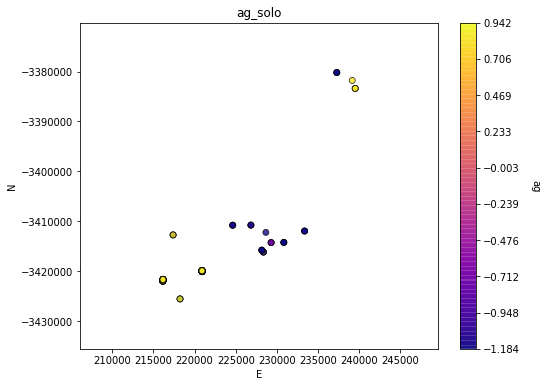

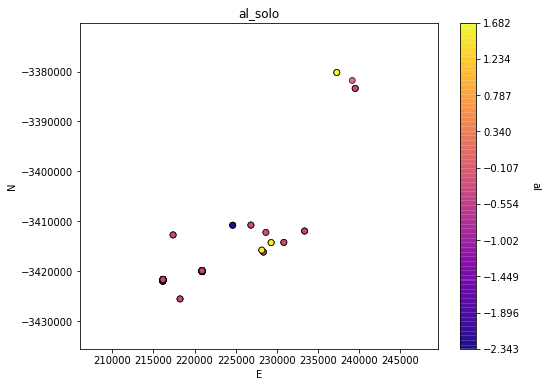

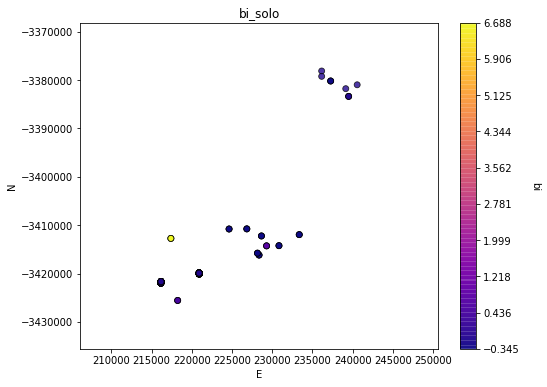

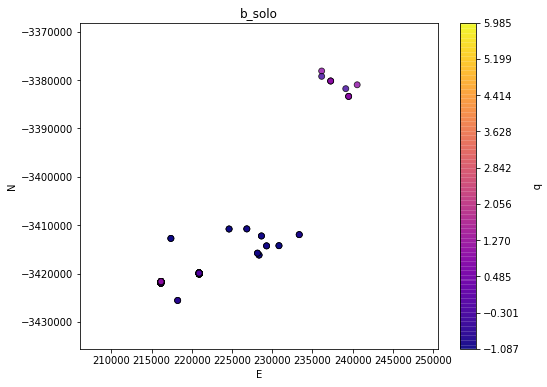

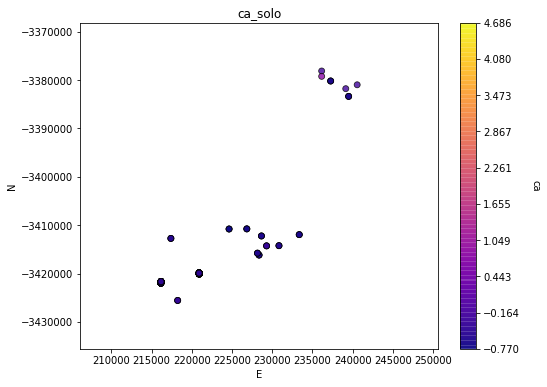

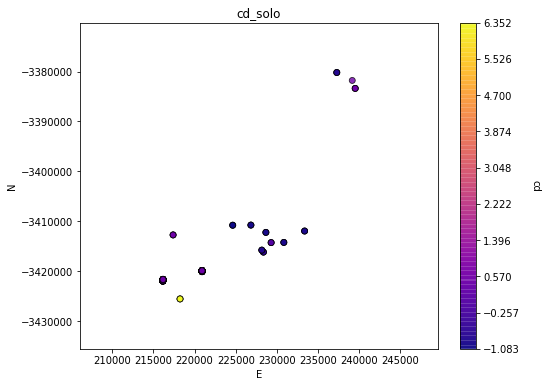

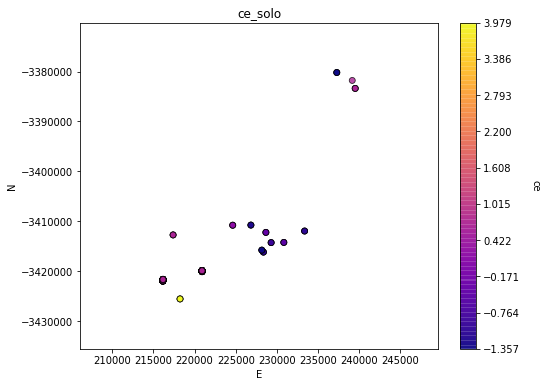

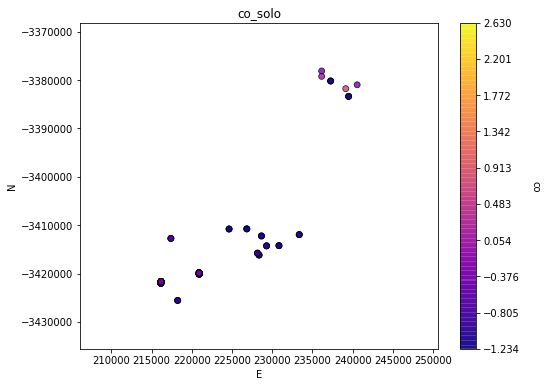

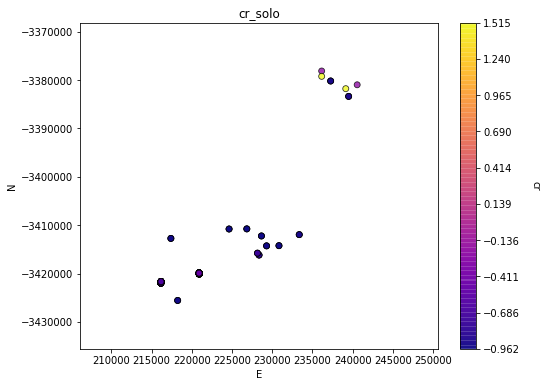

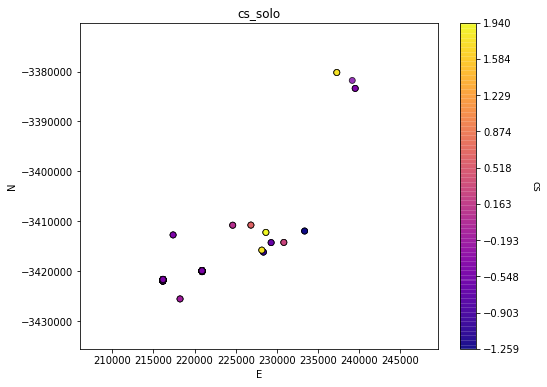

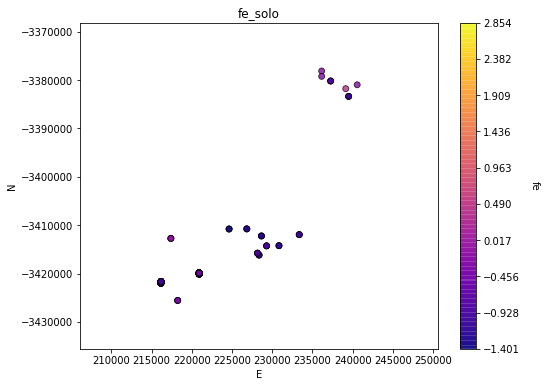

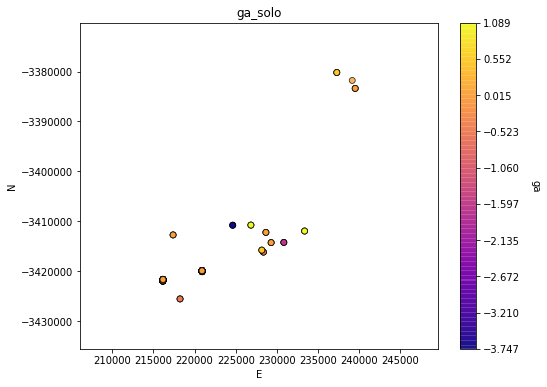

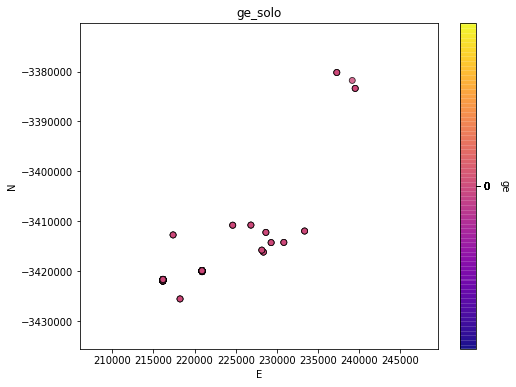

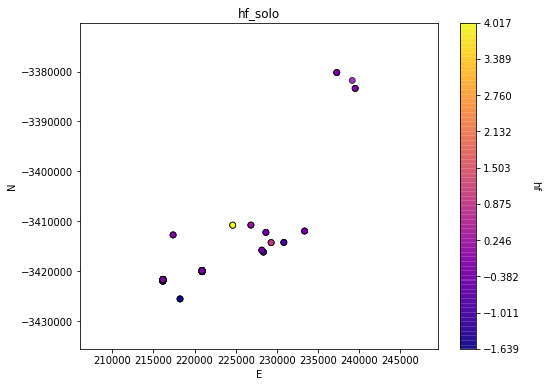

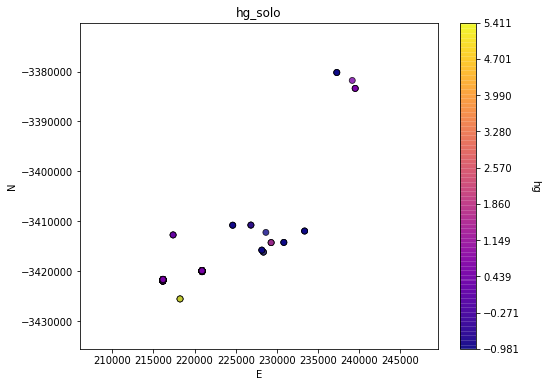

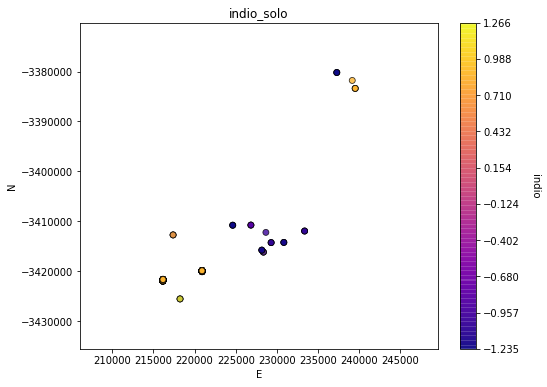

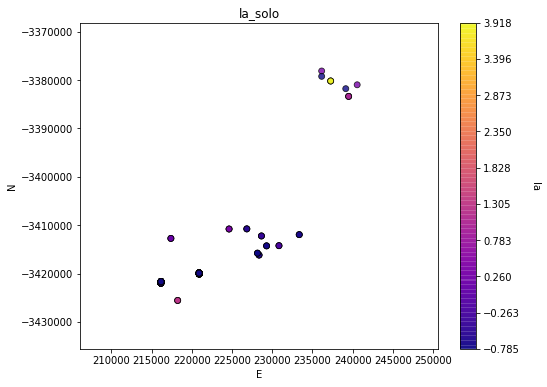

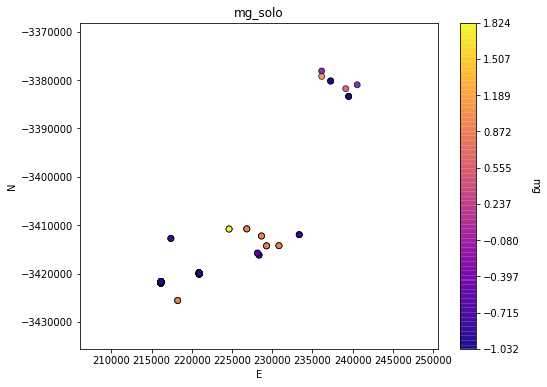

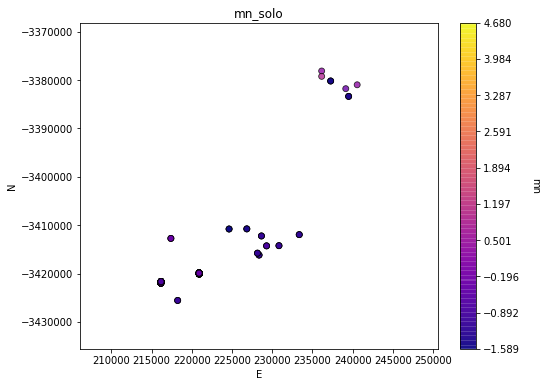

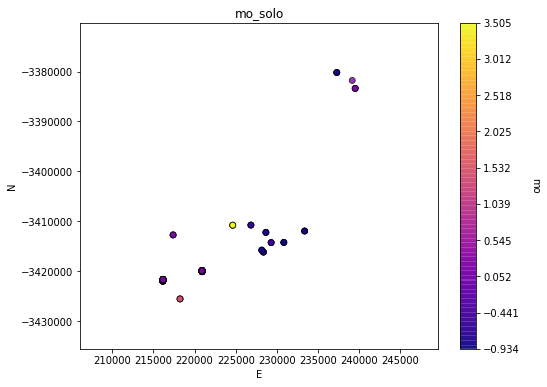

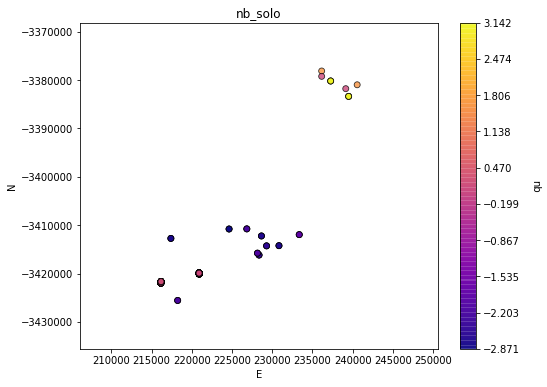

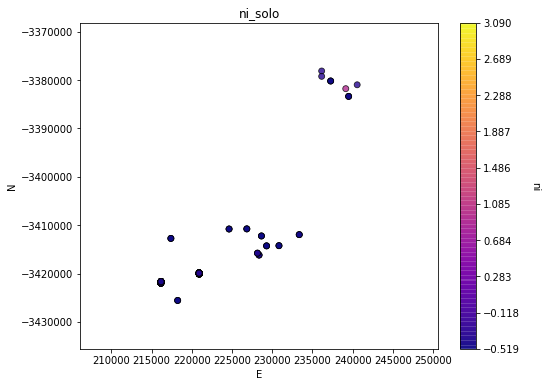

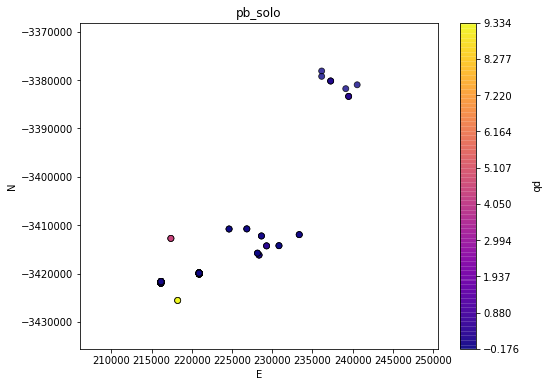

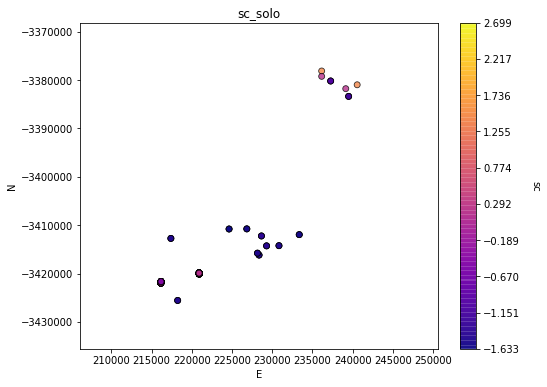

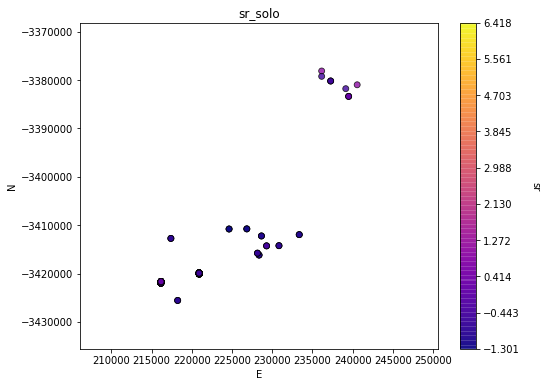

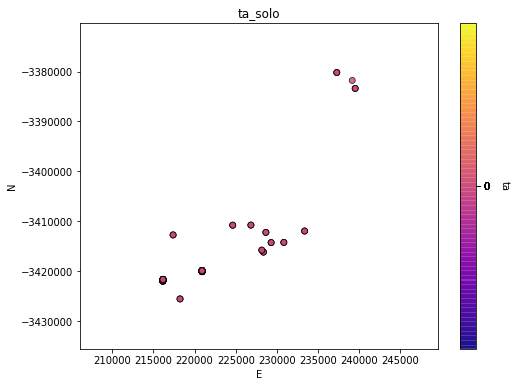

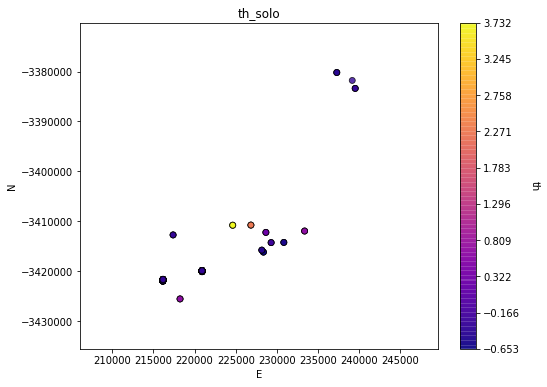

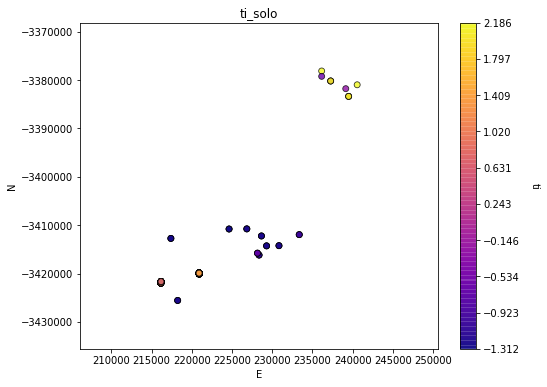

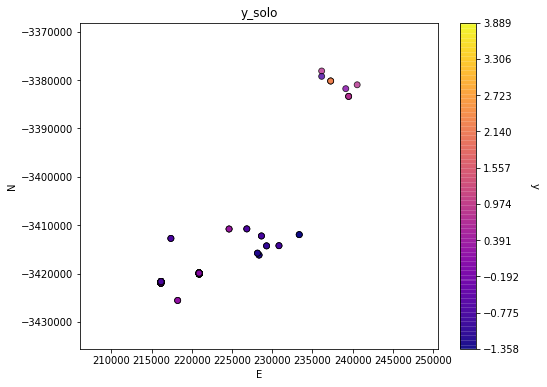

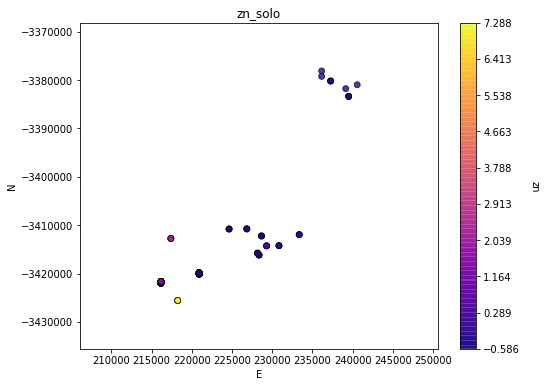

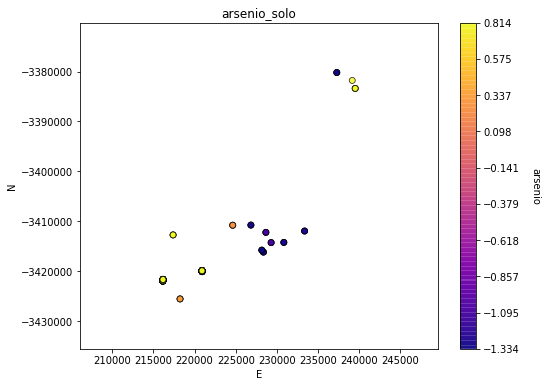

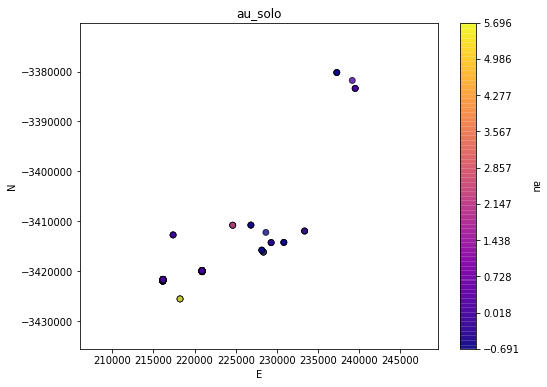

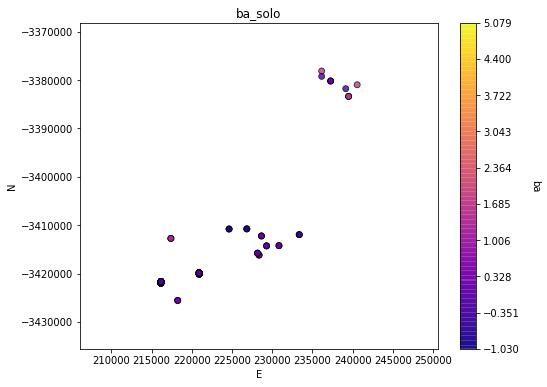

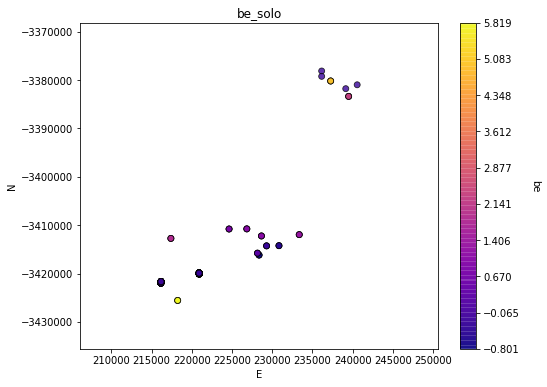

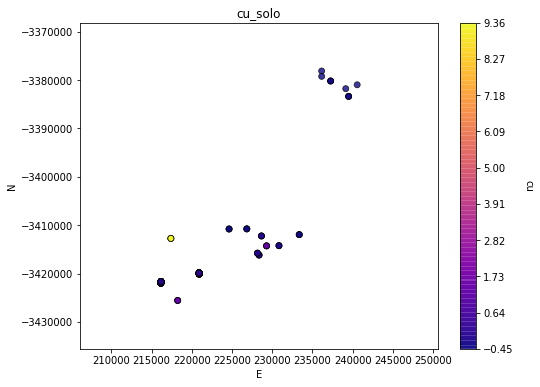

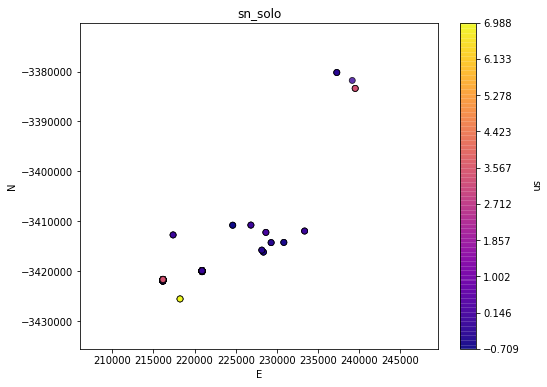

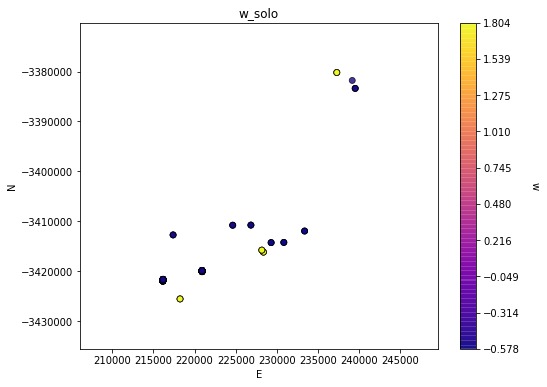

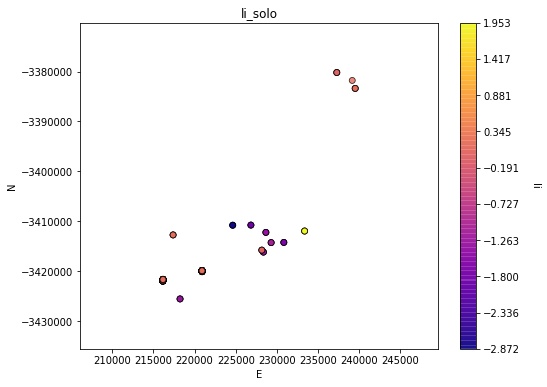

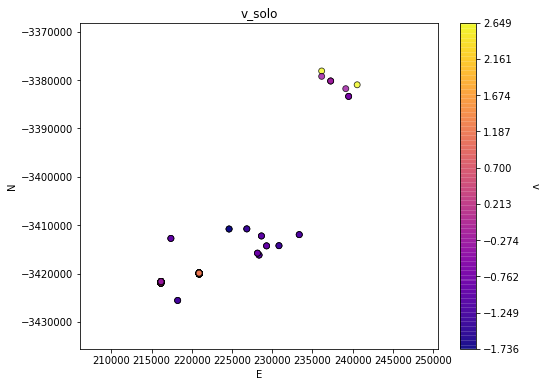

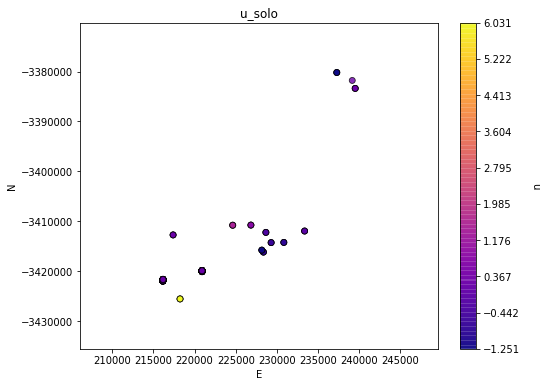

In [ ]:
for c, v in enumerate (variaveis):
  sbd = bd.loc[:,['POINT_X', 'POINT_Y', v]].dropna()
  if len(sbd['POINT_X']) != 0:
    xmin = min(sbd['POINT_X']) - 10000 ; xmax = max(sbd['POINT_X']) + 10000
    ymin = min(sbd['POINT_Y']) - 10000 ; ymax = max(sbd['POINT_Y']) + 10000
    vmin = min(sbd[v]) ; vmax = max(sbd[v])
    cmap = plt.cm.plasma
    GSLIB.locmap(df=sbd, xcol='POINT_X', ycol='POINT_Y', vcol=v,
              xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, vmin=vmin, vmax=vmax,
              title=f'{v}_solo', xlabel='E', ylabel='N', vlabel=v, cmap=cmap, fig_name=f'{v}_solo')
  else:
    print(f'A variavel {v} não possui valores.')

#Distribuição pontual dos teores anômalos

A variavel ag não possui valores anômalos.


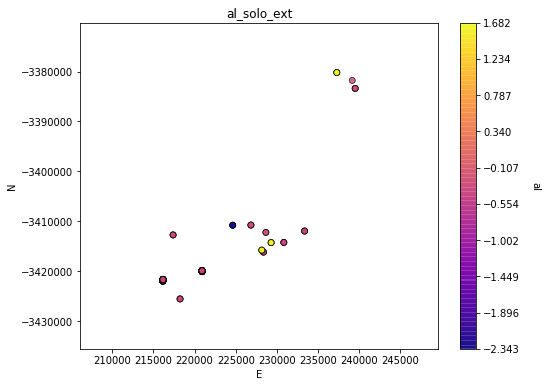

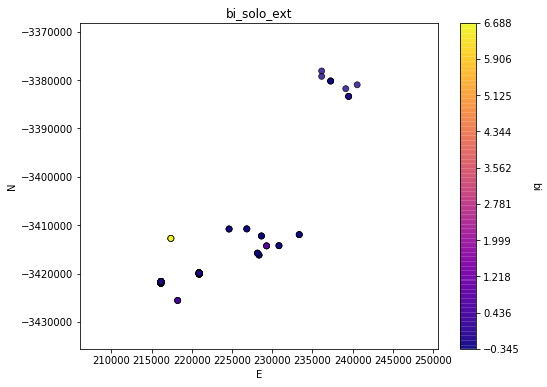

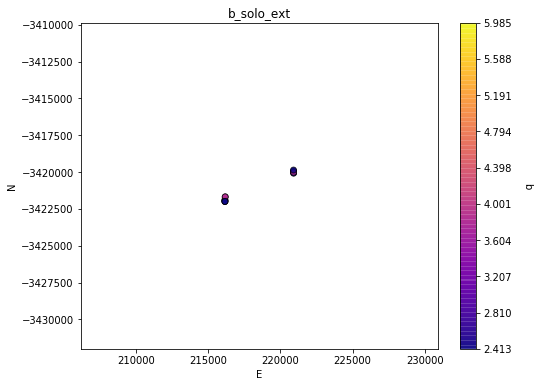

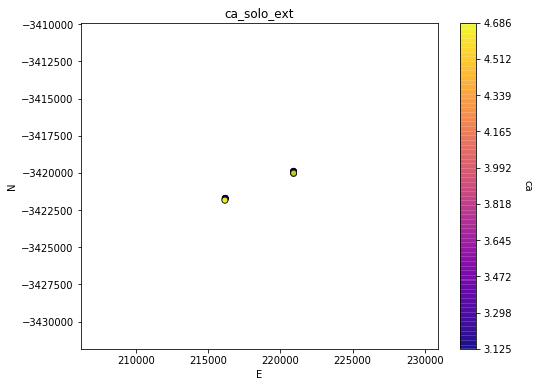

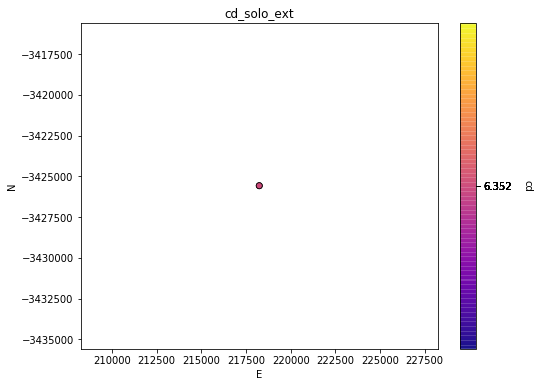

A variavel ce não possui valores anômalos.
A variavel co não possui valores anômalos.
A variavel cr não possui valores anômalos.


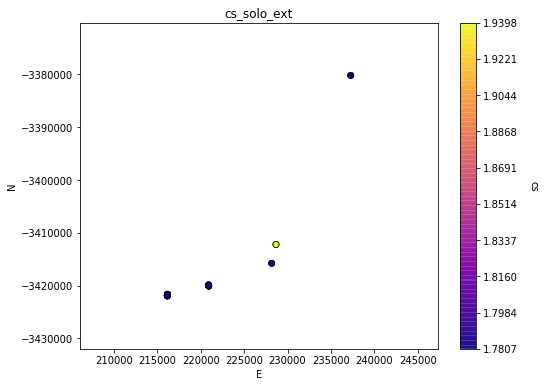

A variavel fe não possui valores anômalos.


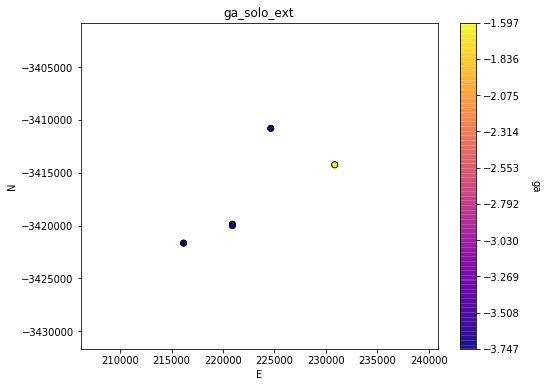

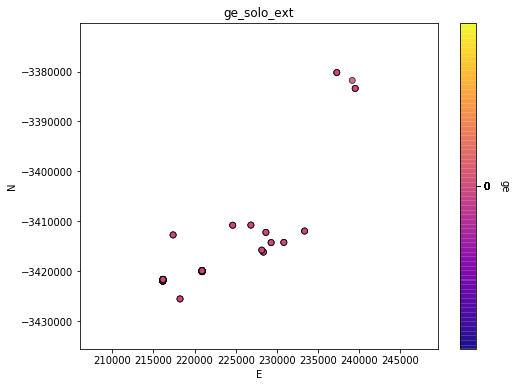

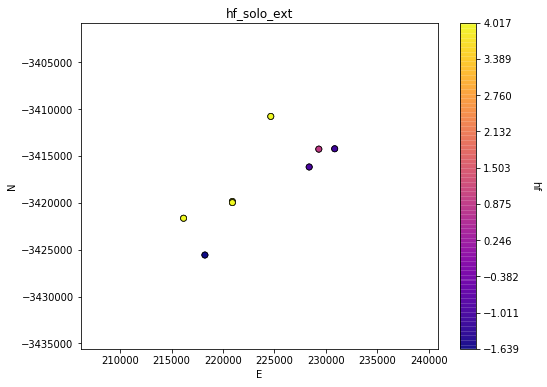

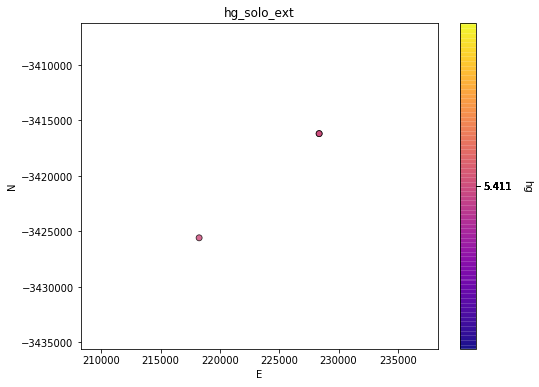

A variavel indio não possui valores anômalos.


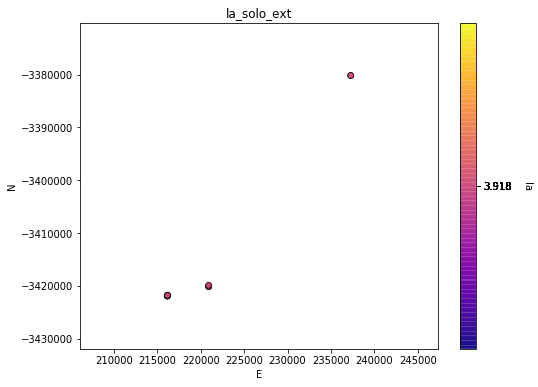

A variavel mg não possui valores anômalos.


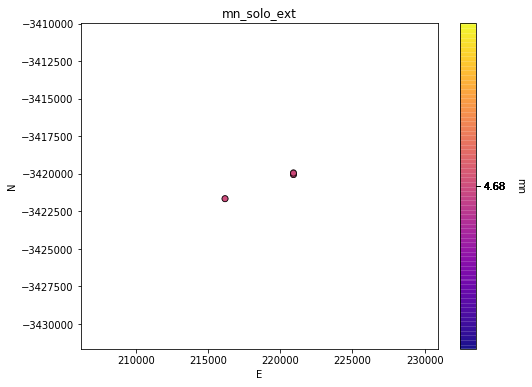

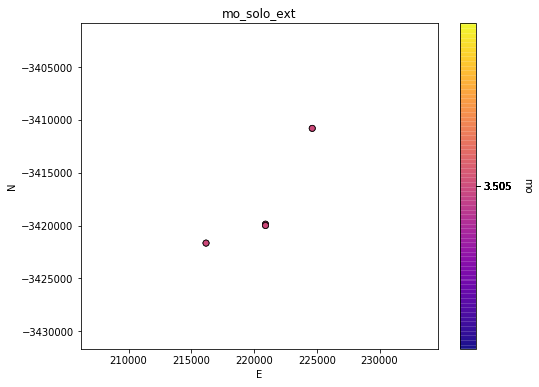

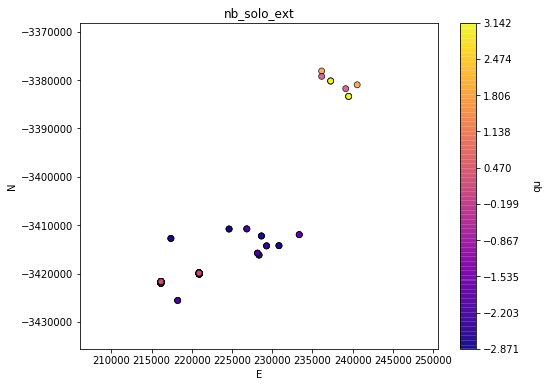

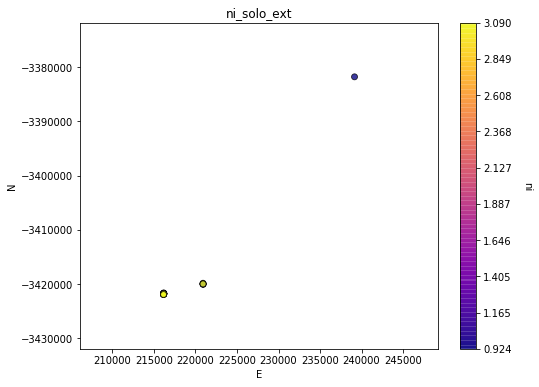

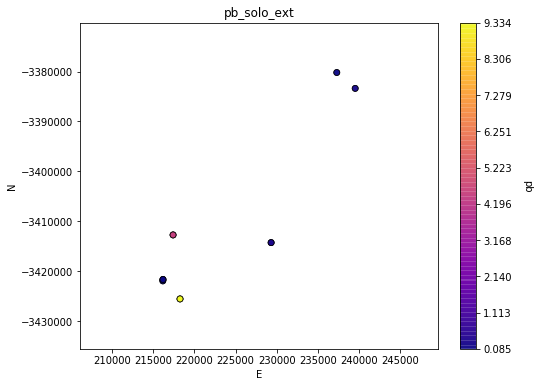

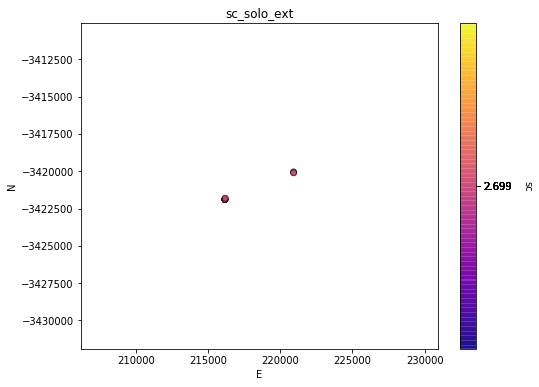

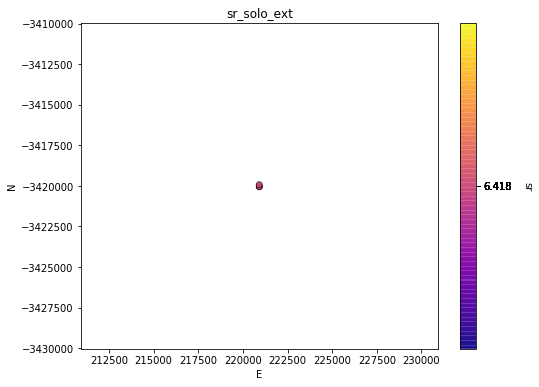

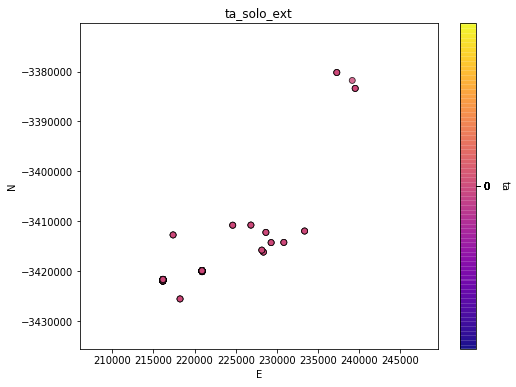

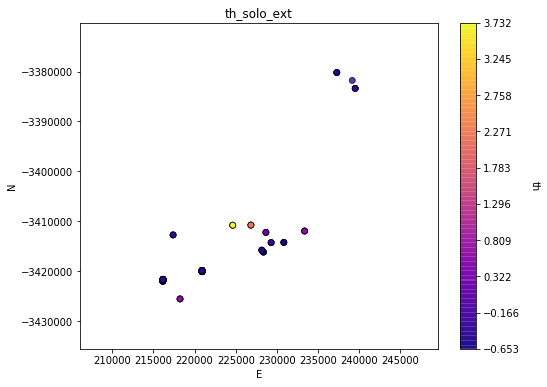

A variavel ti não possui valores anômalos.


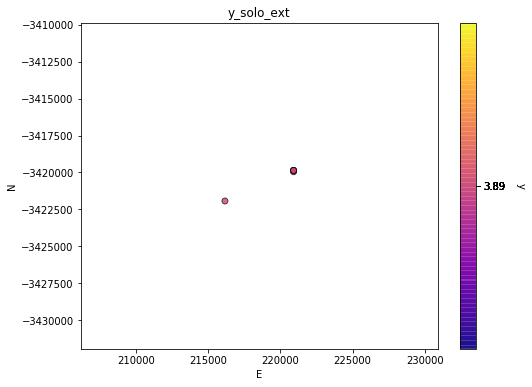

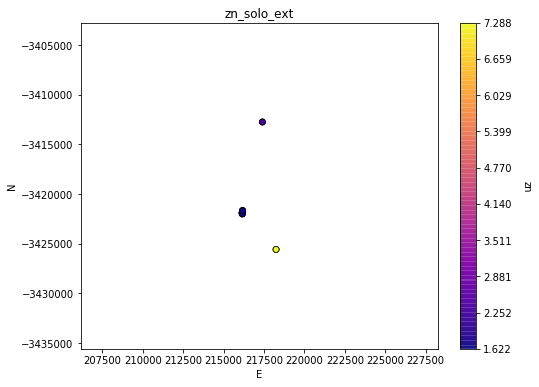

A variavel arsenio não possui valores anômalos.


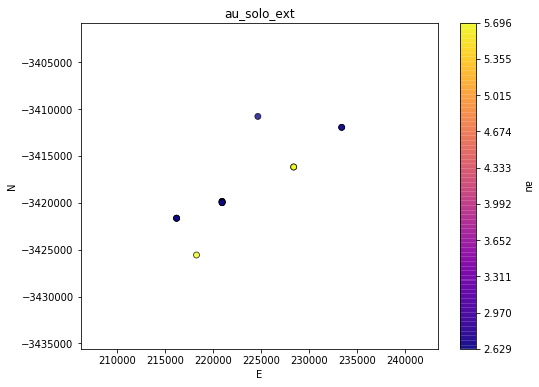

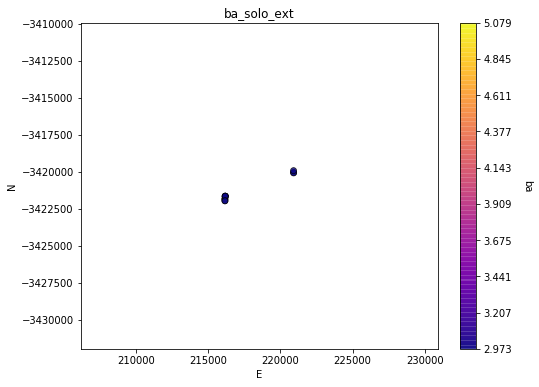

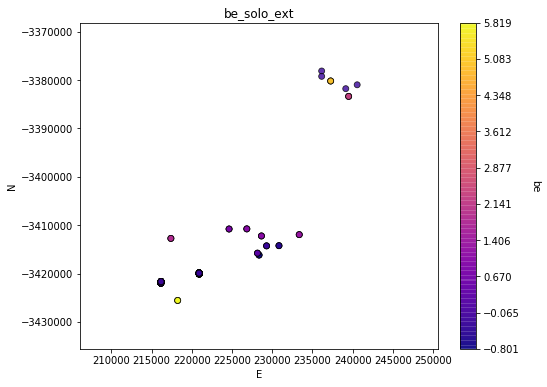

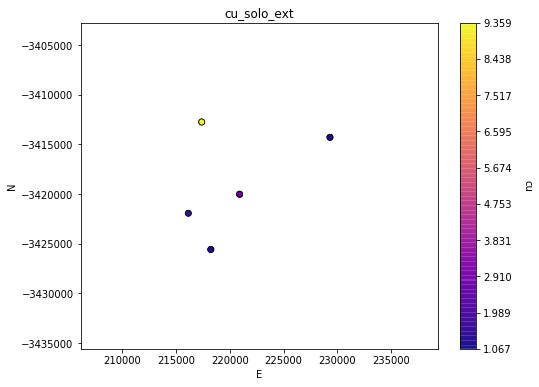

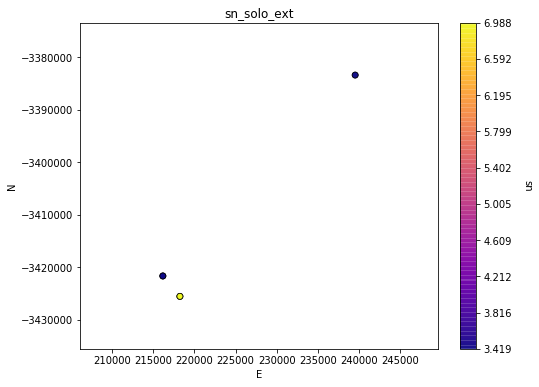

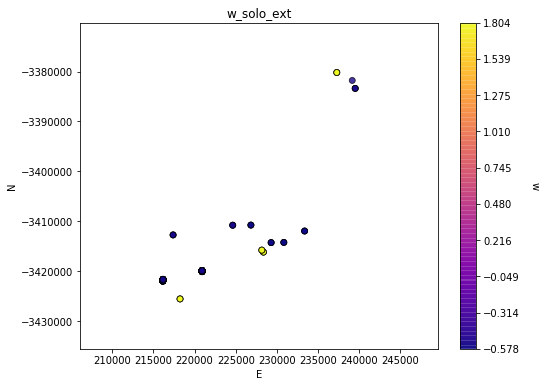

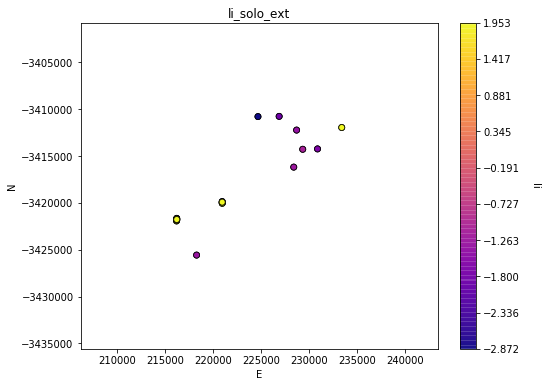

A variavel v não possui valores anômalos.


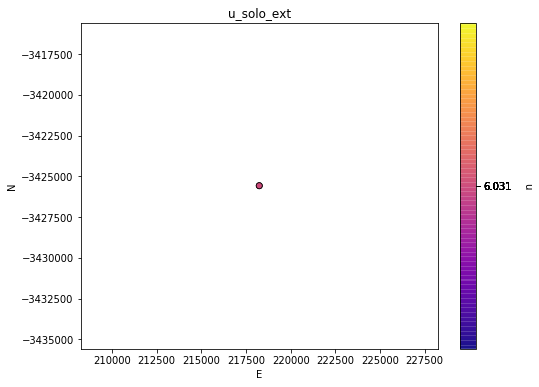

In [ ]:
for c, v in enumerate (variaveis):
  sbd = bd.loc[:,['POINT_X', 'POINT_Y', v]].dropna()
  ext = sbd[(sbd[v] >= suma.loc['início extremos superiores',v])
   | (sbd[v] <= suma.loc['início extremos inferiores',v])]
  if len(ext['POINT_X']) != 0:
    xmin = min(ext['POINT_X']) - 10000 ; xmax = max(ext['POINT_X']) + 10000
    ymin = min(ext['POINT_Y']) - 10000 ; ymax = max(ext['POINT_Y']) + 10000
    vmin = min(ext[v]) ; vmax = max(ext[v])
    cmap = plt.cm.plasma
    GSLIB.locmap(df=ext, xcol='POINT_X', ycol='POINT_Y', vcol=v,
              xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, vmin=vmin, vmax=vmax,
              title=f'{v}_solo_ext', xlabel='E', ylabel='N', vlabel=v, cmap=cmap, fig_name=f'{v}_solo_ext')
  else:
    print(f'A variavel {v} não possui valores anômalos.')


#Distribuição espacial das variáveis

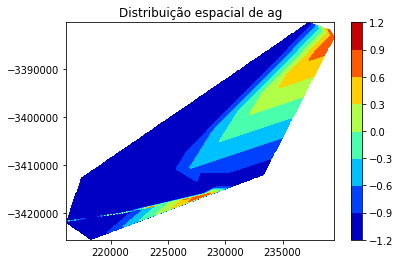

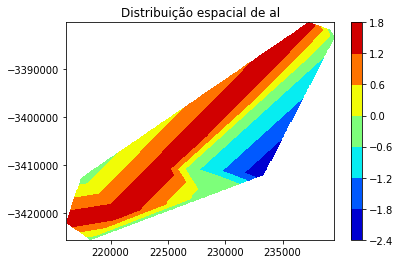

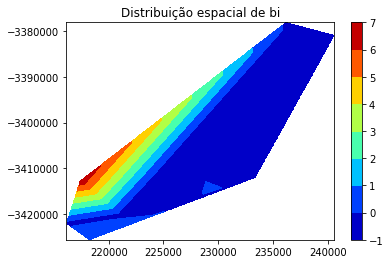

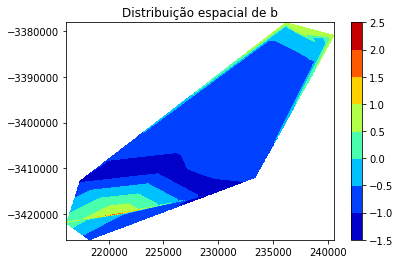

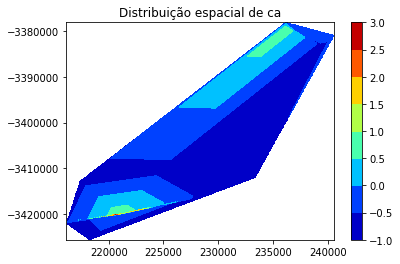

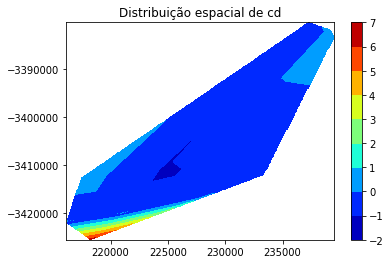

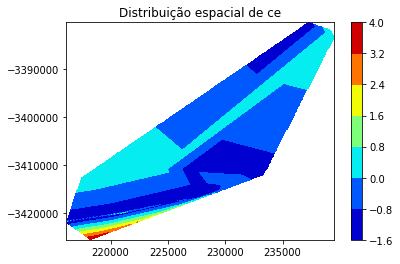

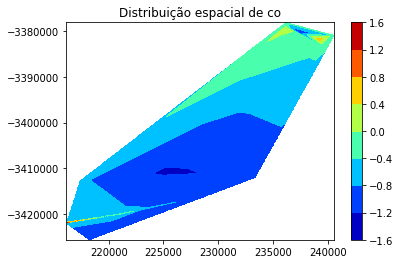

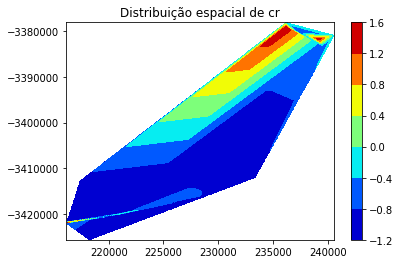

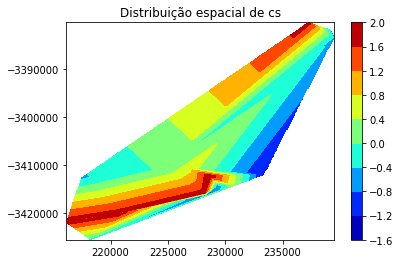

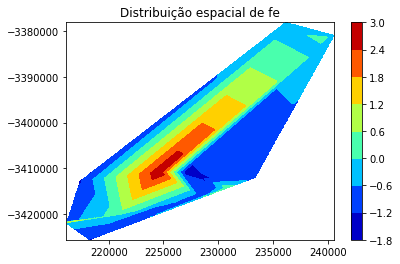

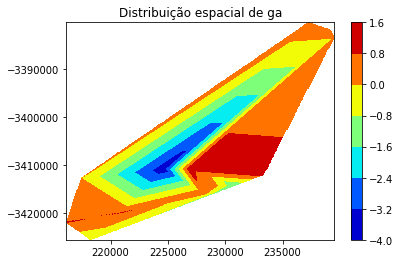

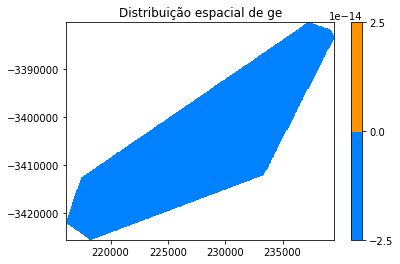

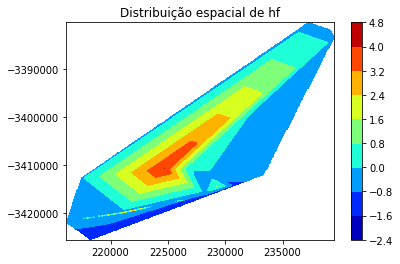

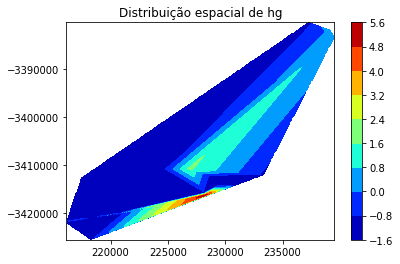

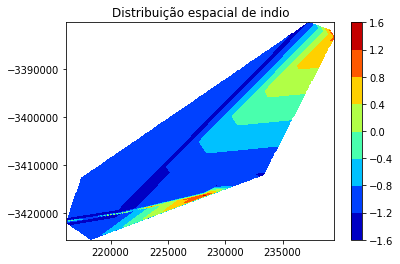

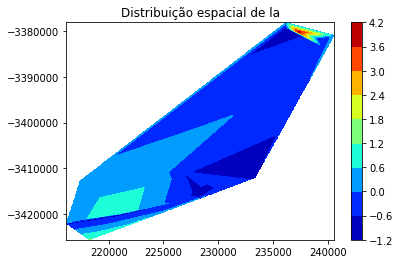

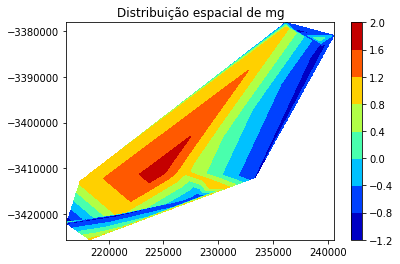

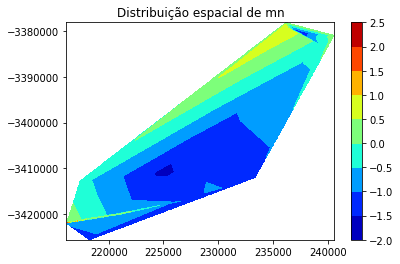

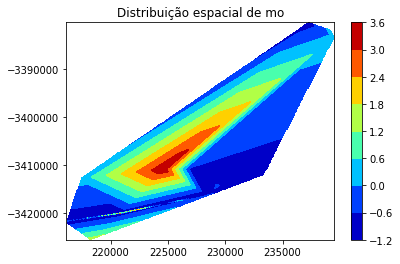

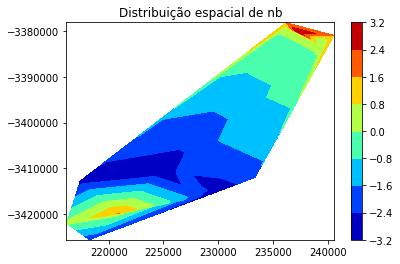

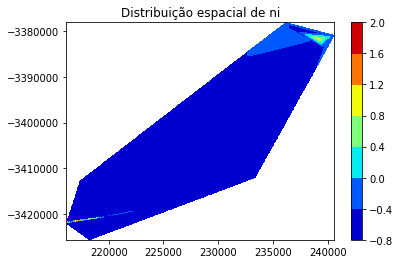

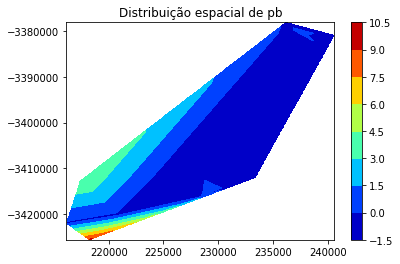

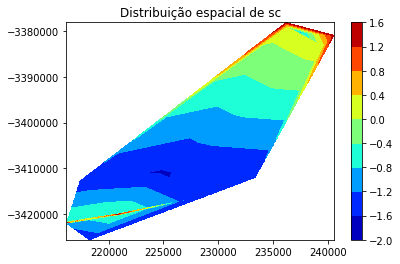

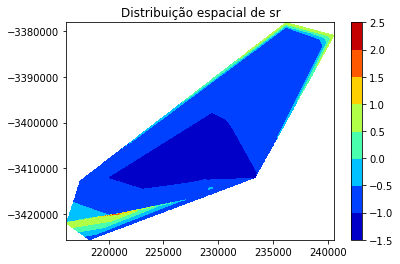

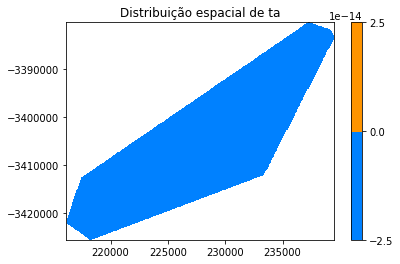

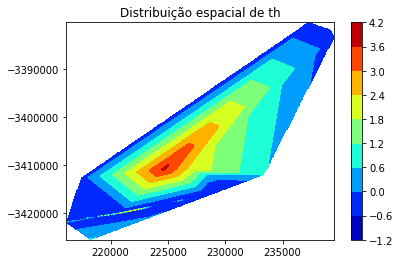

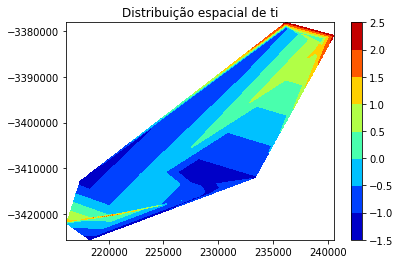

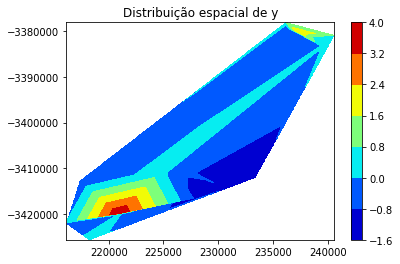

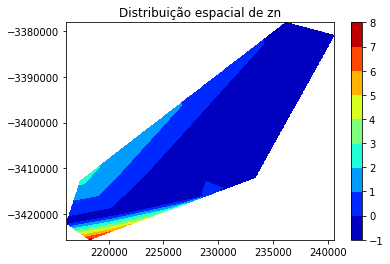

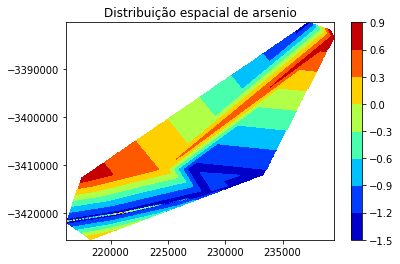

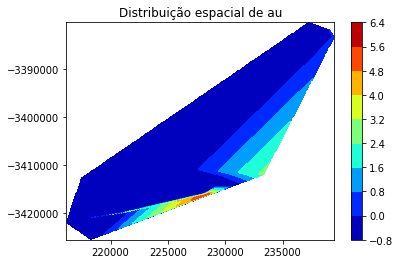

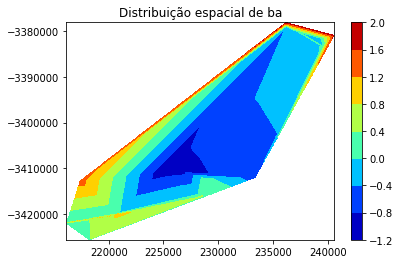

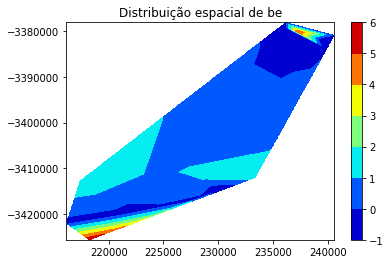

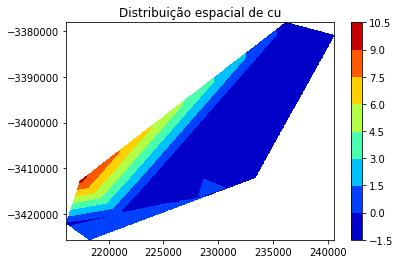

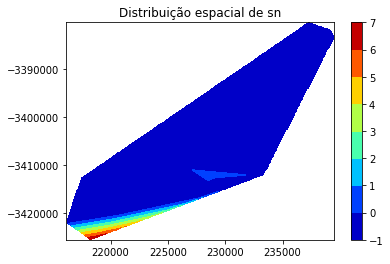

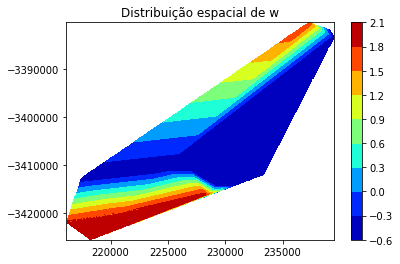

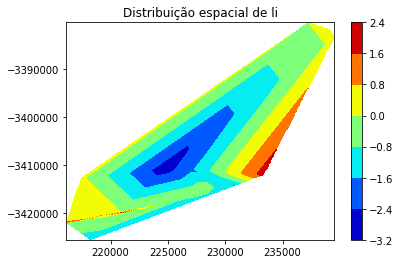

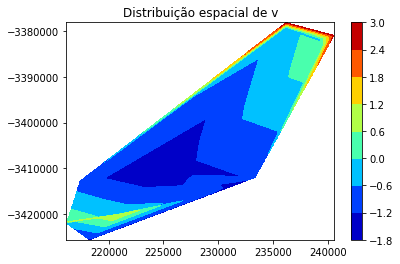

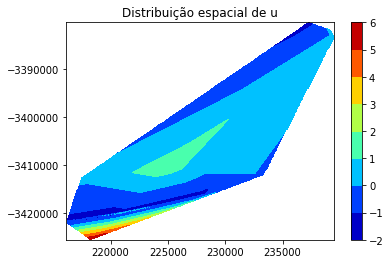

In [ ]:
for c, v in enumerate (variaveis):
  sbd = bd.loc[:,['POINT_X', 'POINT_Y', v]].dropna()
  if len(sbd['POINT_X']) != 0: 
    em = np.sqrt(((xmax - xmin)*(ymax - ymin)))/len(sbd[v])
    x = np.array(sbd.POINT_X.values)
    y = np.array(sbd.POINT_Y.values)
    z = np.array(sbd[v].values)
    resol = float(em)
    xinum = (max(x) - min(x)) / resol
    yinum = (max(y) - min(y)) / resol
    xi = np.linspace(min(x), max(x), xinum)
    yi = np.linspace(min(y), max(y), yinum)
    xi, yi = np.meshgrid(xi, yi)
    zi = scipy.interpolate.griddata((x, y), z, (xi, yi), method='linear')
    #Zi =  np.ma.masked_array(zi, zi < 1)
    cmap = plt.get_cmap('jet')
    c = plt.contourf(xi, yi, zi, cmap=cmap)
    plt.colorbar(c)
    plt.title(f'Distribuição espacial de {v}')
    plt.show()
  else:
    print(f'A variável {v} não possui dados')